# Reading Images

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
messi = cv2.imread('messi.jpeg')
logo = cv2.imread('logo.jpeg')
dogs = cv2.imread('dogs.jpeg')
faces = cv2.imread('faces.jpeg')
pyramid = cv2.imread('pyramid.jpeg')
background = cv2.imread('background.jpeg')
coins = cv2.imread('Coins.jpeg')
task1 = cv2.imread('Task 1.jpeg')
task2 = cv2.imread('Task 2.jpeg')
task3 = cv2.imread('Task 3.jpg')

In [116]:
messi_rgb = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)
logo_rgb = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)
dogs_rgb = cv2.cvtColor(dogs, cv2.COLOR_BGR2RGB)
faces_rgb = cv2.cvtColor(faces, cv2.COLOR_BGR2RGB)
pyramid_rgb = cv2.cvtColor(pyramid, cv2.COLOR_BGR2RGB)
background_rgb = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
coins_rgb = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
task1_rgb = cv2.cvtColor(task1, cv2.COLOR_BGR2RGB)
task2_rgb = cv2.cvtColor(task2, cv2.COLOR_BGR2RGB)
task3_rgb = cv2.cvtColor(task3, cv2.COLOR_BGR2RGB)

messi_gray = cv2.cvtColor(messi, cv2.COLOR_BGR2GRAY)
logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
dogs_gray = cv2.cvtColor(dogs, cv2.COLOR_BGR2GRAY)
faces_gray = cv2.cvtColor(faces, cv2.COLOR_BGR2GRAY)
pyramid_gray = cv2.cvtColor(pyramid, cv2.COLOR_BGR2GRAY)
background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
task1_gray = cv2.cvtColor(task1, cv2.COLOR_BGR2GRAY)
task2_gray = cv2.cvtColor(task2, cv2.COLOR_BGR2GRAY)
task3_gray = cv2.cvtColor(task3, cv2.COLOR_BGR2GRAY)

# Session 1

## Task 1

Function to display Image

In [11]:
# type=normal_img , RGB_img, gray_img, full_path_img
def dispImg(img,type='normal_img',title='Cv2 Image'):
  try:
    if type=='full_path_img':
      showImg = cv2.imread(img)
    else:
      showImg=img
    plt.figure(figsize=(6,5))
    if type=='RGB_img' or type=='gray_img':
      plt.imshow(showImg,cmap='gray')
    else:
      plt.imshow(cv2.cvtColor(showImg, cv2.COLOR_BGR2RGB))
    if title=='Cv2 Image':
      if type=='full_path_img':
        plt.title(str(img).replace('.jpeg','').replace('.jpg','').replace('.png',''))
      else:
        plt.title("Cv2 Image")
    else:
      plt.title(title)
  except:
    print('Not a valid image')

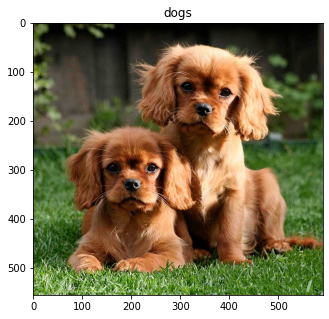

In [12]:
dispImg('dogs.jpeg','full_path_img')

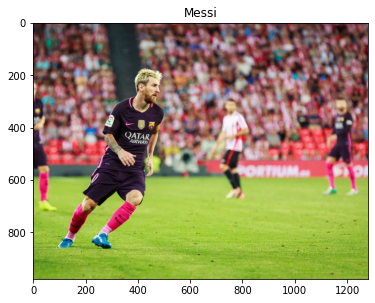

In [13]:
dispImg(messi,'normal_img','Messi')

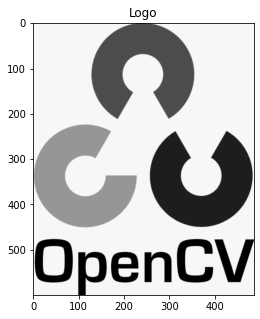

In [14]:
dispImg(logo_gray,'gray_img','Logo')

Function to display List of Images

In [15]:
# type=normal_img , RGB_img, gray_img, full_path_img
def dispListImgs(imgList,type='normal_img',title='Cv2 Image'):
  f = plt.figure(figsize=(15,10))
  for i in range(len(imgList)):
    if type=='full_path_img':
      showImg = cv2.imread(imgList[i])
    else:
      showImg=imgList[i]
    ax = f.add_subplot(int(len(imgList)/3)+1,3,i+1)
    
    if type=='RGB_img' or type=='gray_img':
      ax.imshow(showImg)
    else:
      ax.imshow(cv2.cvtColor(showImg, cv2.COLOR_BGR2RGB))
    if title=='Cv2 Image':
      if type=='full_path_img':
        ax.set_title(str(str(imgList[i]).replace('.jpeg','').replace('.jpg','').replace('.png','')))
      else:
        ax.set_title("Cv2 Image")
    else:
        ax.set_title(title)

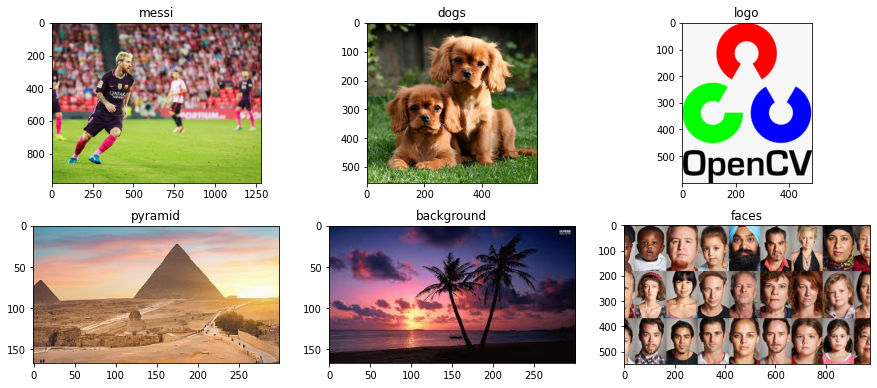

In [16]:
dispListImgs(['messi.jpeg','dogs.jpeg','logo.jpeg','pyramid.jpeg',
              'background.jpeg','faces.jpeg'],'full_path_img')

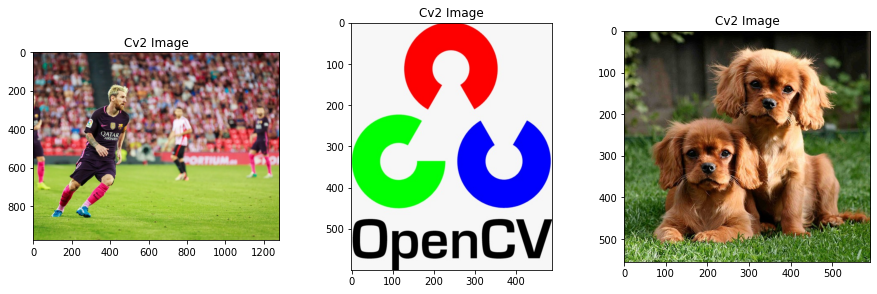

In [17]:
dispListImgs([messi_rgb,logo_rgb,dogs_rgb],'RGB_img')

## Task 2

HSV Color Space Application


*HSV model is used in histogram equalization.

*Converting grayscale images to RGB color images. 

*Visualization of images is easy as by plotting the H and S components we can vary the V component or vice-versa and see the different visualizations.

## Task 3

Add Logo to Image

In [18]:
logo.shape

(600, 487, 3)

In [52]:
range_low=np.array([200,200,200])
range_high=np.array([255,255,255])

mask=cv2.inRange(logo,range_low,range_high)

logo[mask>0]=(0,0,0)
logo[470:,:]=0

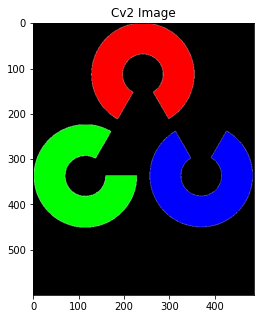

In [53]:
dispImg(logo)

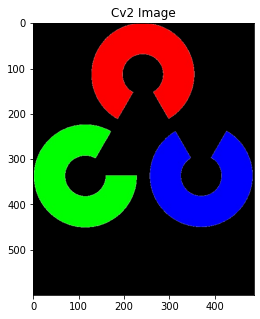

In [20]:
dispImg(logo)

In [21]:
width = int(logo.shape[1] * 0.5)
height = int(logo.shape[0] * 0.5)

logoResized = cv2.resize(logo, (width,height))

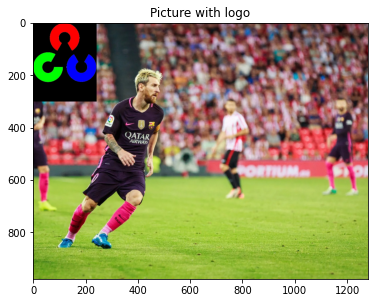

In [22]:
messiWithLogo = messi.copy()

messiWithLogo[0:height,0:width] = logoResized

dispImg(messiWithLogo,title='Picture with logo')

## Task 4

Add Logo without background to image

In [23]:
logoWithoutBackground = logoResized.copy()

In [24]:
for i in range(len(logoResized)):
  for j in range(len(logoResized[i])):
    if np.mean(logoResized[i][j])<5:
      logoWithoutBackground[i][j]=cv2.bitwise_or(logoResized[i][j],messi[0:height,0:width])[i][j]

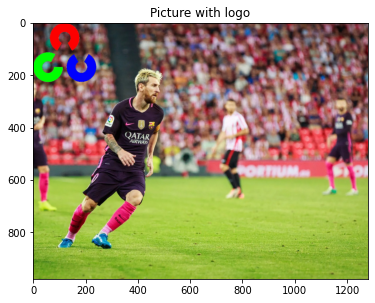

In [25]:
messiWithLogo2 = messi.copy()

messiWithLogo2[0:height,0:width] = logoWithoutBackground

dispImg(messiWithLogo2,title='Picture with logo')

# Session 2


## Exercise 1

Thresholding on coins image

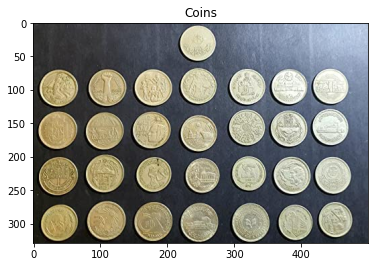

In [ ]:
dispImg(coins,title='Coins')

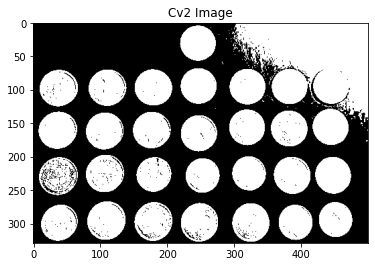

In [ ]:
ret,mask = cv2.threshold(coins_gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

dispImg(mask)

In [ ]:
print(ret)

119.0


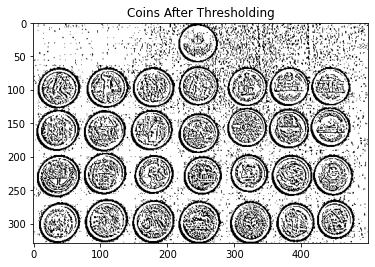

In [ ]:
binary_image = cv2.adaptiveThreshold(coins_gray, 255, cv2.BORDER_REPLICATE, cv2.ADAPTIVE_THRESH_MEAN_C,11,5)

dispImg(binary_image,title='Coins After Thresholding')

## Task 1

Segmentation

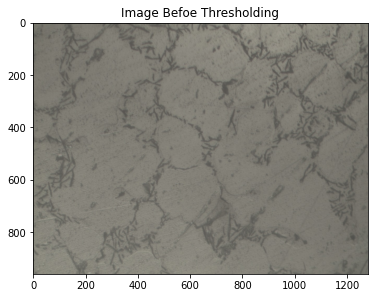

In [94]:
dispImg(task1,title='Image Befoe Thresholding')

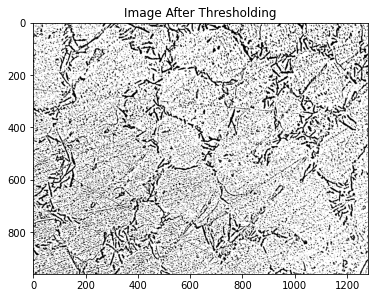

In [89]:
binary_image = cv2.adaptiveThreshold(task1_gray, 255, cv2.BORDER_REPLICATE, cv2.ADAPTIVE_THRESH_MEAN_C,19,3)

dispImg(binary_image,title='Image After Thresholding')

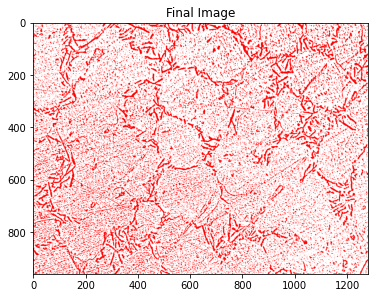

In [90]:
newImg = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2RGB)

range_low=np.array([0,0,0])
range_high=np.array([0,0,0])

mask=cv2.inRange(newImg,range_low,range_high)

newImg[mask>0]=(0,0,255)

dispImg(newImg,title='Final Image')

## Task 2

Thresholding

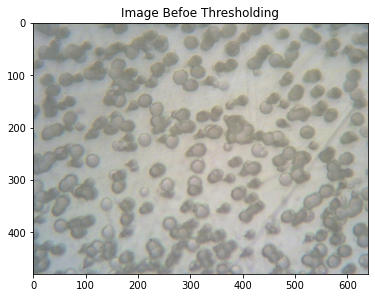

In [95]:
dispImg(task2,title='Image Befoe Thresholding')

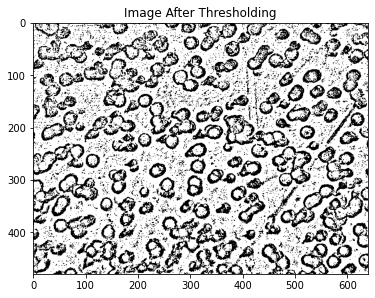

In [93]:
binary_image = cv2.adaptiveThreshold(task2_gray, 255, cv2.BORDER_REPLICATE, cv2.ADAPTIVE_THRESH_MEAN_C,19,3)

dispImg(binary_image,title='Image After Thresholding')

## Task 3

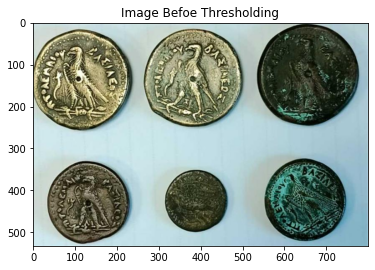

In [132]:
dispImg(task3,title='Image Befoe Thresholding')

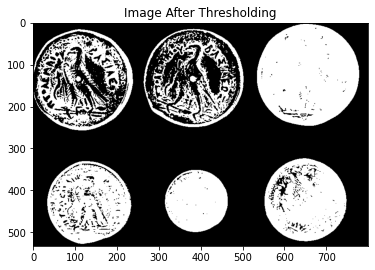

In [123]:
ret,mask = cv2.threshold(task3_gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

dispImg(mask,title="Image After Thresholding")

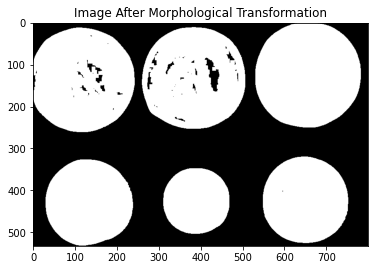

In [133]:
kernel = np.ones((5,5),dtype=np.float32)/255
# morph = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
morph = cv2.dilate(mask,kernel,iterations=2)

dispImg(morph,title="Image After Morphological Transformation")